# Import dataset,split and normalize

In this section i imported some needed stuff from sklearn,numpy and matplot which I will need later.
before imported the dataset with load_wine() function from sklearn and then i took the first two attributes.
i have splitted two time the dataset with the function 'train_test_split' from sklearn:

- first split : 50% train-split 50% temporary
- second split from **temporary**: 40% validation-split and 60% test-split

this means respect on full-dataset:

- 50% train split
- 20% validation split
- 30% test split

please note the attributes **stratify** and **random_state=x**,

- **stratify**: balance the number of different clesses for each split ex (#3 label A,#3 label B, #3 label C)
- **random_state=X:** note that train_tes_split split random by default, X is the seed for generate random number, in this case on every execution the splits generated are the same, without random_state=X on every execution the splits are generated random.

**normalization:**
i have normalized the split with the function **StandardScaler** from sklearn,first i fit the scaler with the train+validation then i scaled train,test and validation splits .
i've also created a new split called "x_train_val" needed for train the algorithms after tuning the usefull values on validation set and then valuate it on test set.

In [330]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn import neighbors,svm
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics # accuracy stuff 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler #normalize
from sklearn.decomposition import PCA

#IMPORT DATASET
data = load_wine()

#split first two attributes dataset (1)
x = data.data[:,:2] # all row,first two col
y = data.target # label

#extra request
#x=data.data[:,8:10] #uncomment this line to change the selected attributes


''' Split randomly and stratified train,validation,test (3)
#stratify balance the splits with the data given in y'''

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.5,stratify=y,random_state=9)

x_validation , x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.60,
                                                               stratify=y_temp,random_state=9)
#normalize
scaler = StandardScaler()
scaler.fit(np.concatenate((x_train, x_validation)))

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)

#train+validation usefull for training the algorithms after tuning params on validation set
x_train_val=np.concatenate((x_train,x_validation))
y_train_val=np.concatenate((y_train,y_validation))


In [331]:
# FUNCIONS NEEDED FOR PLOT CREATION
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# decision boundaries, type can be colormesh or contour
def plot_boundaries(graph, classifier, xx, yy,type_='colormesh'):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if type_ == 'colormesh':    # print colormesh (not interpolated)
        out = graph.pcolormesh(xx, yy, Z,cmap=cmap_light)
    elif type_ == 'contour':                # print contourf (interpolated) used in SVM
        out = graph.contourf(xx, yy, Z,cmap=cmap_light) 
    return out

    


# KNN

the basic function of the algorithm is to evaluate the class based on the medium of the classes of nearest neighbors, ex:

if k-nearest neighbors on average are 'red' the considered point is probably red.

is very important the K value : the number of nearest neighbors tath the algorithm evaluate.
in theory an higher k reduce the noise
but the classifier is less robust

### PLOT DATA AND DECISION BOUNDARY

in this section i iterate over k values;


for each k values create a knn-classifier which is fitted with train data,every classifier is evaluated on validation set for find the K-value which give better score.

for each classifier are printed the boundaries and the train point,

we see the trend of the graphs as the parameter k changes.

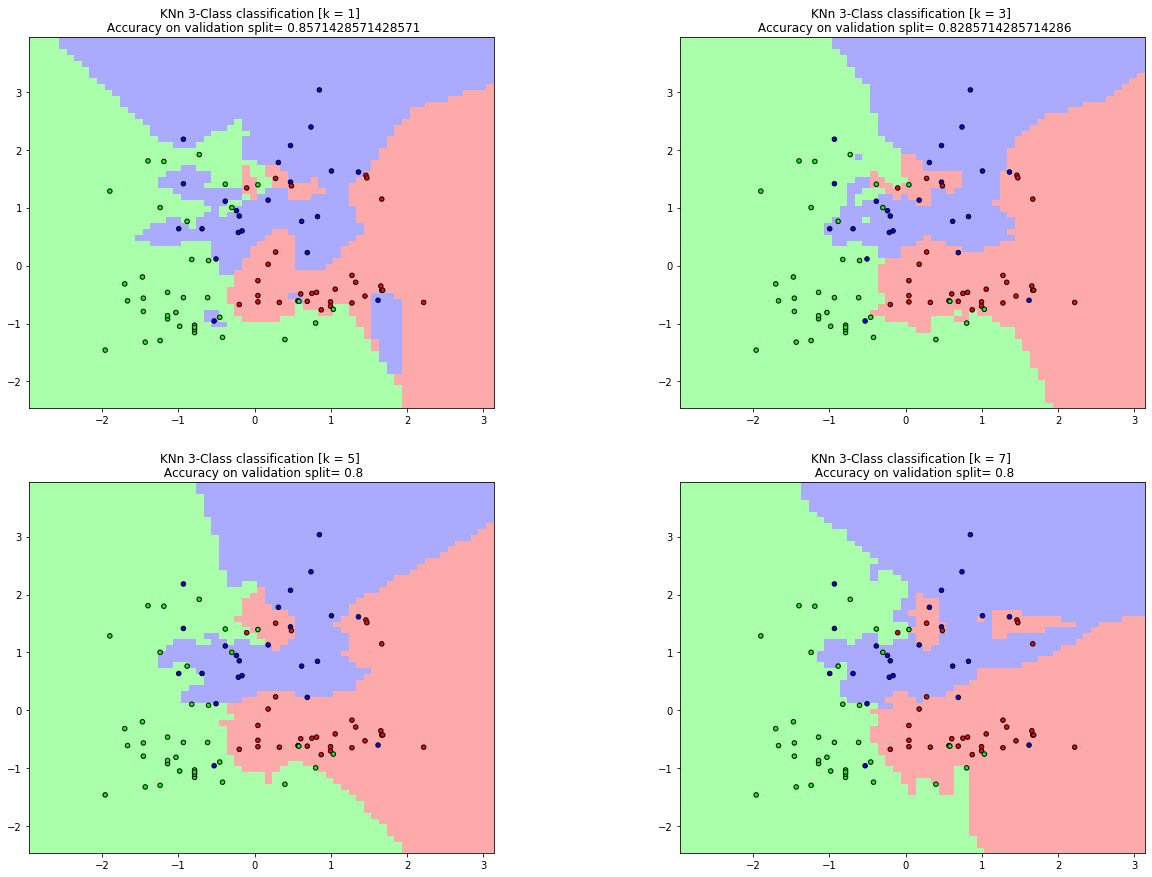

[BEST K = 1] accuracy: 0.8571428571428571


In [332]:

k_values = [1,3,5,7]
step=0.1 # step size
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(20,15))
plt.subplots_adjust(wspace=0.4, hspace=0.2)

accuracy={} # K_selected:accuracy
max_acc=0

#APPLY Knn 
for k,graph in zip(k_values,sub.flatten()):
    classifier = neighbors.KNeighborsClassifier(k)
    classifier.fit(x_train,y_train) #train the classifier
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    xx,yy = make_meshgrid(x_train[:, 0],x_train[:, 1],step)
    plot_boundaries(graph,classifier,xx,yy,'colormesh')
    # Plot also the training points
    graph.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=20)
    graph.set_xlim(xx.min(), xx.max())
    graph.set_ylim(yy.min(), yy.max())
    # EVALUATE ACCURACY ON VALIDATION SET
    pred_i = classifier.predict(x_validation)
    accuracy[k]=metrics.accuracy_score(y_validation, pred_i)
    if accuracy[k] > max_acc:
        max_acc=accuracy[k]
        best_k=k
    graph.set_title("KNn 3-Class classification [k = {k}] \n Accuracy on validation split= {acc}".format(k=k,acc=accuracy[k]))
plt.show()

print('[BEST K = {}] accuracy: {}'.format(best_k,accuracy[best_k]))

    


## How the boundaries change? 

it seems to me that as K increases, the boundaries of the densest point shrink, while the boundaries of the most scattered point widen

### ACCURACY (ON VALIDATION SPLIT) CHANGING K

this graph show how varies the accuracy with different k, please note that this graph is extremly dipendent on which split are generated at first point, ex: with another split we can see 
a completely different graph.

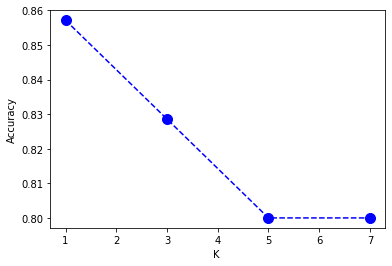

In [333]:
#ACCURACY GRAPH 
plt.figure()
plt.plot(list(accuracy.keys()), list(accuracy.values()), color='blue', 
         linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
#plt.title('ACCURACY CHANGING K')

plt.xlabel('K ')
plt.ylabel('Accuracy')
plt.show()
    

### EVALUATE THE MODEL ON TEST SET

now i evaluated the model ( with the best k found on validation set) on test set,
we can see the accuracy lower than the accuracy on validation set.

In [334]:
#EVALUATE THE MODEL ON THE TEST SET WITH BEST K
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_val, y_train_val)
pred_i = knn.predict(x_test)
acc=metrics.accuracy_score(y_test, pred_i)
    
print("Accuracy on TEST SET (k={}):".format(best_k),acc)
print(classification_report(y_test, pred_i))

Accuracy on TEST SET (k=1): 0.7407407407407407
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.84      0.76      0.80        21
           2       0.60      0.60      0.60        15

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



# SVM

the purpose of SVM is to find a linear hyperplane to separate the data.

we can find different hyperplane, but which one is better?

the goal is to find the hyperplane to maximizes the margins from different classes.

but if the boundaries are not linearly separable?

Transform data into higher dimensional space!

we can use a **kernel** to do this.

there are two important params for **tuning** the algorithm:

- **C** value:
    is like a threshold that tell to SVM how much you want to avoid misclassifying each training. ex:
 
  - lower C: generate a higher-margin hyperplane that smoothly the classifier -> increase the probability of the outliers
  - higher C: generate a lower-margin hyperplane that minimize the missclassification

- **Gamma** value:  determine the influence distance of a single sample:
  - lower gamma: also distant points are considered from classifier
  - higher gamma: only nearbly points are considered from classifier


## Linear SVM

i trained a linear-SVM for each given C ([0.001, 0.01, 0.1, 1, 10, 100,1000]) with test split,
for each classifier there is printed the boundaries, the train points and the score on validation set.
each classifier is evaluated on validation set to find the best C value for this classifier,
then when the best c is found
i trained a new classifier with train set+validation and c set and evaluate the accuracy on it 

*nb: in my implementation if found the same accuracy with different C i prefeer to chose the lowest C value.*

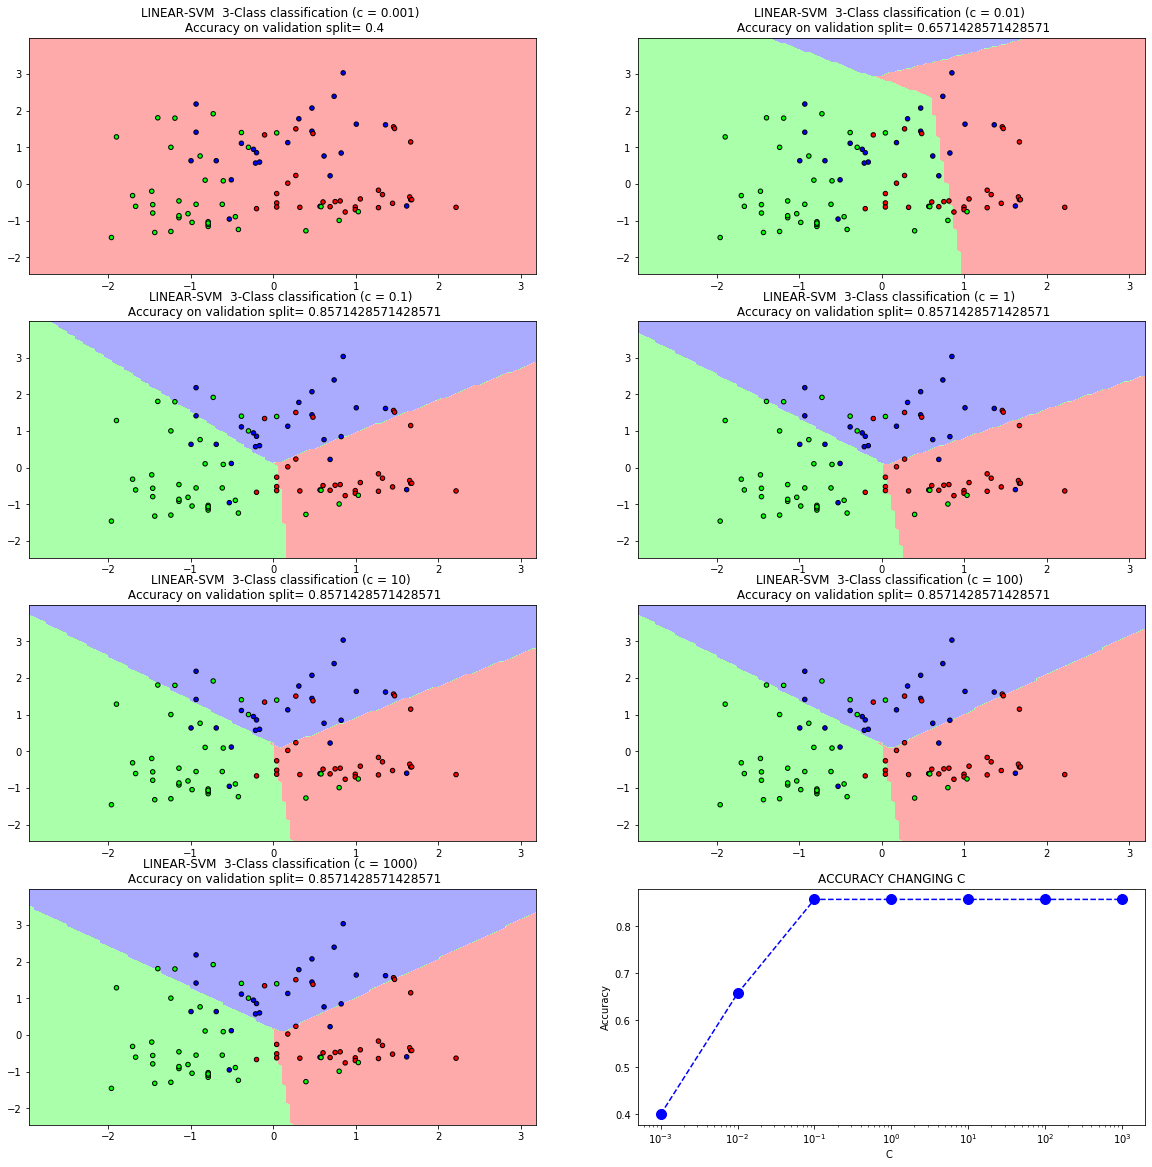

[ VALIDATION SET] BEST C = 0.1 => accuracy = 0.8571428571428571

[ EVALUATE ON TEST SET with BEST c ] => Accuracy =  0.8703703703703703


In [335]:
#train 
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
fig, sub = plt.subplots(4, 2,figsize=(20,20))
#plt.subplots_adjust(wspace=0.4, hspace=0.4)
accuracy={}
max_acc=0
for c,graph in zip(C,sub.flatten()):
    classifier=svm.SVC(C=c,kernel='linear')
    classifier.fit(x_train,y_train)
    xx,yy = make_meshgrid(x_train[:, 0],x_train[:, 1],0.05)
    plot_boundaries(graph,classifier,xx,yy,'contour')    
     # Plot also the training points
    graph.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=20)
    graph.set_xlim(xx.min(), xx.max())
    graph.set_ylim(yy.min(), yy.max())
    
    #evaluate accuracy 
    pred_i = classifier.predict(x_validation)
    accuracy[c]=metrics.accuracy_score(y_validation, pred_i)
    if accuracy[c] > max_acc:
        max_acc=accuracy[c]
        best_c=c
    graph.set_title("LINEAR-SVM  3-Class classification (c = {c}) \n Accuracy on validation split= {acc}".format(c=c,acc=accuracy[c]))


graph=sub.flatten()[-1]
graph.plot(list(accuracy.keys()), list(accuracy.values()), color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
graph.set_title('ACCURACY CHANGING C')
graph.set_xlabel('C ')
graph.set_ylabel('Accuracy')
graph.set_xscale('log')

plt.show() 
best_c_linear=best_c

print('[ VALIDATION SET] BEST C = {} => accuracy = {}'.format(best_c,accuracy[best_c]))


svm_linear=svm.SVC(C=best_c,kernel='linear')
svm_linear.fit(x_train_val,y_train_val)
pred_i = svm_linear.predict(x_test)
acc=metrics.accuracy_score(y_test, pred_i)
print("\n[ EVALUATE ON TEST SET with BEST c ] => Accuracy = ",acc)




### Evaluate on test set
now i trained the model with train+val split and evaluated it on test set
the score is better than the score on validation set, the tuning of the c parameter seems to be working.

### How the boundaries change? 
we can see on the lowest value of c (0.001) a single boundary 'red', this mean that the c is too small ( and the margin to high) to allow the classifier to differentiate the various classes.

while increasing c value there we see the boundaries becoming more defined but from c=1 to c= 1000 i dont see substancial differences.

## RBF kernel: Radial Base Function 

in this section i want to use the kernel RBF on classifier.

like the linear svm i trained a rbf-SVM for each given C ([0.001, 0.01, 0.1, 1, 10, 100,1000]) with test split to find the best C values.
and then i create a new classifier (fitted with train+val) and evaluate the accuracy on it 


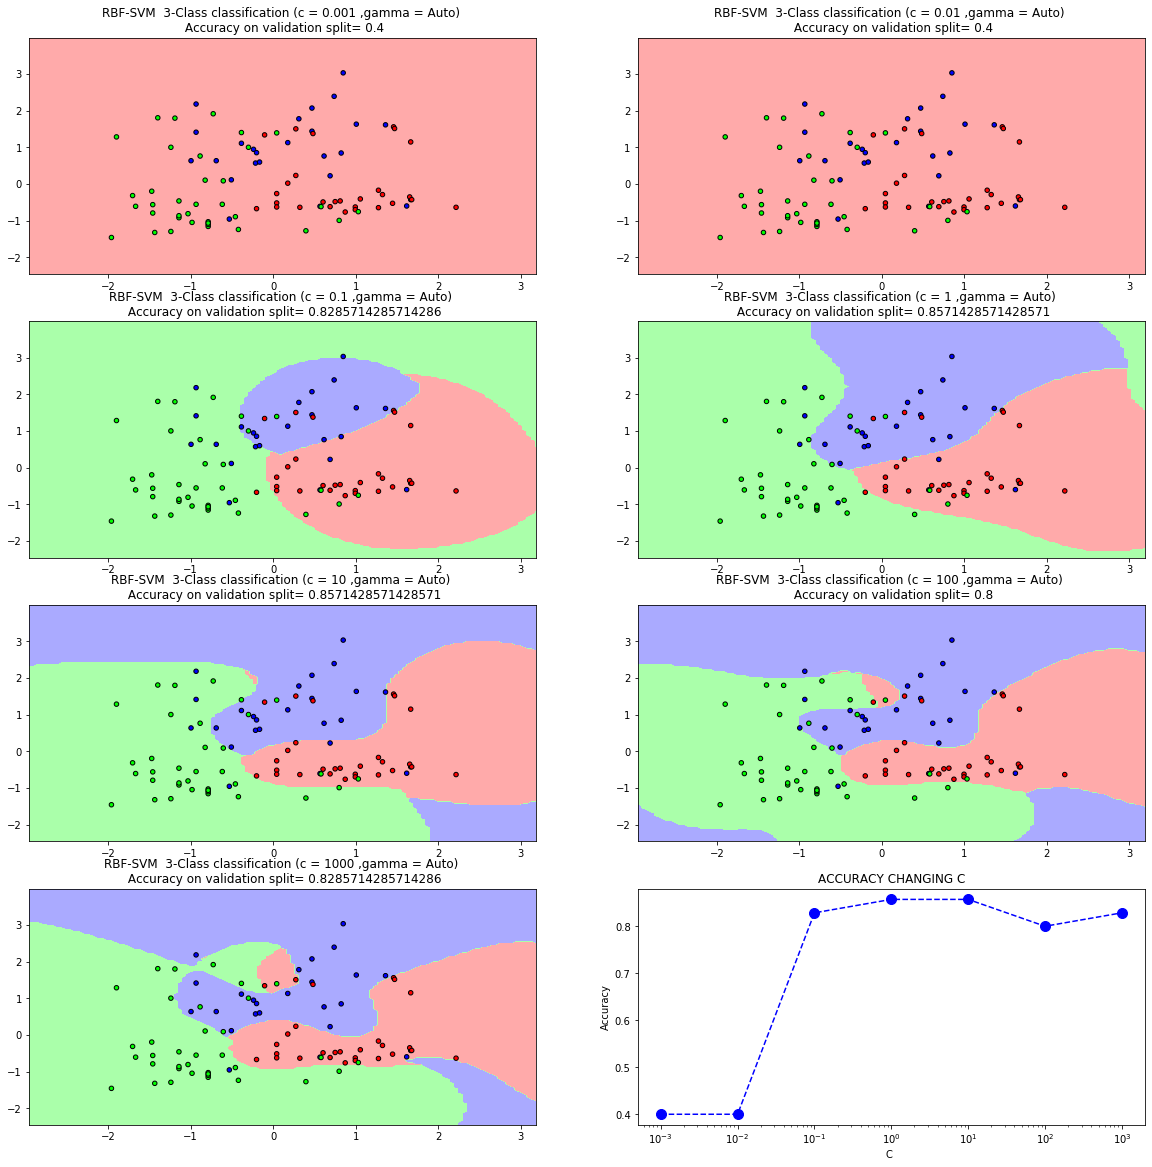

[ VALIDATION SET]  BEST C = 1 , accuracy = 0.8571428571428571

[ TEST SET with BEST c] => Accuracy =  0.9444444444444444


In [336]:
#train 
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
gamma_values=[0.001, 0.01, 0.1, 1, 10, 100,1000]

fig, sub = plt.subplots(4, 2,figsize=(20,20))
#plt.subplots_adjust(wspace=0.4, hspace=0.4)
accuracy={}
max_acc=0
for c,graph in zip(C,sub.flatten()):
    classifier=svm.SVC(C=c,kernel='rbf',gamma='auto')
    classifier.fit(x_train,y_train)
    xx,yy = make_meshgrid(x_train[:, 0],x_train[:, 1],0.05)
    plot_boundaries(graph,classifier,xx,yy,'contour')    
     # Plot also the train points
    graph.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=20)
    graph.set_xlim(xx.min(), xx.max())
    graph.set_ylim(yy.min(), yy.max())
    
    #evaluate accuracy 
    pred_i = classifier.predict(x_validation)
    accuracy[c]=metrics.accuracy_score(y_validation, pred_i)
    if accuracy[c] > max_acc:
        max_acc=accuracy[c]
        best_c=c
    graph.set_title("RBF-SVM  3-Class classification (c = {c} ,gamma = Auto) \n Accuracy on validation split= {acc}".format(c=c,acc=accuracy[c]))
graph=sub.flatten()[-1]
graph.plot(list(accuracy.keys()), list(accuracy.values()), color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
graph.set_title('ACCURACY CHANGING C')
graph.set_xlabel('C ')
graph.set_ylabel('Accuracy')
graph.set_xscale('log')

plt.show()
print('[ VALIDATION SET]  BEST C = {} , accuracy = {}'.format(best_c,accuracy[best_c]))

best_rbf_c=best_c
svm_rbf=svm.SVC(C=best_c,kernel='rbf',gamma='auto')
svm_rbf.fit(x_train_val,y_train_val)
pred_i = svm_rbf.predict(x_test)
acc=metrics.accuracy_score(y_test, pred_i)
print("\n[ TEST SET with BEST c] => Accuracy = ",acc)

### Differences between linear and rbf

obviously the boundaries are no longer linear but are curved, compared to the linear kernel it can be noted that even with c = 0.01 the classifier cannot distinguish the three classes.

we can also see that as C grows, the contours become more 'complex' and detailed.

the difference between the various boundaries is more marked than the linear-svm


### Evaluate on test set

the score is much better than the score on validation set, the tuning of the c parameter seems to be working very good on test set.

## GRID SEARCH

grid search is a training procedure aimed at choosing best c and gamma parameters.

for each  c and  gamma in 
```
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
gamma_values=[0.001, 0.01, 0.1, 1, 10, 100,1000]
```
i fitted an rbf-svm with train split and evaluate on it the accuracy on validation split.
at the end of this double-iteraction i take the touple (c and gamma) that maximize the accuracy (on validation split)


In [337]:
from functools import reduce

accuracy=[]
print('[TUNING GAMMA AND C ON VALIDATION SET]')
for c in C:
    for gamma in gamma_values:
        obj={'c':c,'gamma':gamma}
        classifier=svm.SVC(C=c,kernel='rbf',gamma=gamma)
        classifier.fit(x_train,y_train)
        pred_i = classifier.predict(x_validation)
        obj['accuracy']=metrics.accuracy_score(y_validation, pred_i)
        print('c={} gamma={} accuracy={}'.format(c,gamma,obj['accuracy']))
        accuracy.append(obj)
        
grid_result=reduce((lambda x, y: y if y['accuracy'] > x['accuracy'] else x),accuracy)
print('\n[GRID RESULT] c={} gamma={} accuracy={}'.format(grid_result['c'],grid_result['gamma'],grid_result['accuracy']))



[TUNING GAMMA AND C ON VALIDATION SET]
c=0.001 gamma=0.001 accuracy=0.4
c=0.001 gamma=0.01 accuracy=0.4
c=0.001 gamma=0.1 accuracy=0.4
c=0.001 gamma=1 accuracy=0.4
c=0.001 gamma=10 accuracy=0.4
c=0.001 gamma=100 accuracy=0.4
c=0.001 gamma=1000 accuracy=0.4
c=0.01 gamma=0.001 accuracy=0.4
c=0.01 gamma=0.01 accuracy=0.4
c=0.01 gamma=0.1 accuracy=0.4
c=0.01 gamma=1 accuracy=0.4
c=0.01 gamma=10 accuracy=0.4
c=0.01 gamma=100 accuracy=0.4
c=0.01 gamma=1000 accuracy=0.4
c=0.1 gamma=0.001 accuracy=0.4
c=0.1 gamma=0.01 accuracy=0.4
c=0.1 gamma=0.1 accuracy=0.7428571428571429
c=0.1 gamma=1 accuracy=0.8
c=0.1 gamma=10 accuracy=0.4
c=0.1 gamma=100 accuracy=0.4
c=0.1 gamma=1000 accuracy=0.4
c=1 gamma=0.001 accuracy=0.4
c=1 gamma=0.01 accuracy=0.8
c=1 gamma=0.1 accuracy=0.8285714285714286
c=1 gamma=1 accuracy=0.8571428571428571
c=1 gamma=10 accuracy=0.8857142857142857
c=1 gamma=100 accuracy=0.6285714285714286
c=1 gamma=1000 accuracy=0.4
c=10 gamma=0.001 accuracy=0.7714285714285715
c=10 gamma=0.01 ac

*nb: in my implementation if found the same accuracy with different C and Gamma i prefeer to chose the one with lowest C value.*

### Evaluate best params found with grid search on test set

unlike previous, the model seems to be worse on test set with the best c and gamma founded.

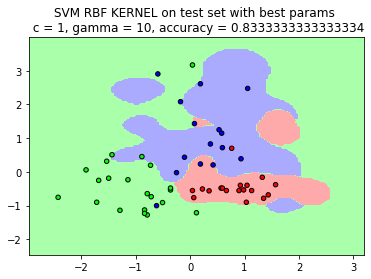

In [338]:

svm_rbf_grid=svm.SVC(C=grid_result['c'],kernel='rbf',gamma=grid_result['gamma'])
svm_rbf_grid.fit(x_train_val,y_train_val)        
pred_i = svm_rbf_grid.predict(x_test)
ris=metrics.accuracy_score(y_test, pred_i)
xx,yy = make_meshgrid(x_train_val[:, 0],x_train_val[:, 1],0.05)
plot_boundaries(plt,svm_rbf_grid,xx,yy,'contour')    
     # Plot also the test points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM RBF KERNEL on test set with best params \n c = {}, gamma = {}, accuracy = {}'.format(grid_result['c'],grid_result['gamma'],ris))
plt.show()


## K-FOLD cross validation (5 split) and grid search
now i use the cross validation to grid-search the best values of c and gamma;

the k-fold cross validation automatically decide the partition that will ensure a better train
for doing this i merged train and validation splits in a single split used by kfold.

for simplicity i use the function GridSearchCV from sklearn to perform both cross-fold validation and gridSearch.

now the grid search is executed for each split generated by k-fold and for each tuple of c and gamma values

and then the result show us the best values found over iterations of cross-validation


In [339]:
from sklearn.model_selection import GridSearchCV

# merge train and validation
x_new_train=np.concatenate((x_train, x_validation))
y_new_train=np.concatenate((y_train, y_validation))


# GRID SEARCH WITH KFOLD (5split)
parameters = {'kernel':['rbf'], 'C':C,'gamma':gamma_values}
svc = svm.SVC(kernel='rbf')
grid5svm = GridSearchCV(svc, parameters, cv=5,scoring='accuracy',iid='false')
grid5svm.fit(x_new_train, y_new_train)
best_params=grid5svm.best_params_
print ('[GRID RESULT]',grid5svm.best_params_)


[GRID RESULT] {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


### Evaluate best params found with kfold and grid search on test set

the tuning of the c and gamma parameters seems to be working very good on test set giving an accuracy on average better than earlier.

*nb: the data-points in the plot are the test point not the training point*

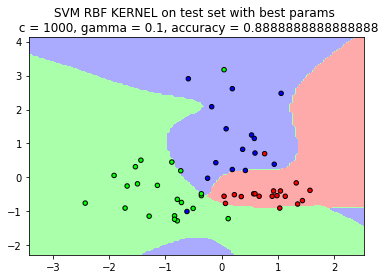

In [340]:
svm_rbf_kfold=svm.SVC(C=best_params['C'],kernel='rbf',gamma=best_params['gamma'])
svm_rbf_kfold.fit(x_new_train,y_new_train)
pred_i = svm_rbf_kfold.predict(x_test)
ris=metrics.accuracy_score(y_test, pred_i)
xx,yy = make_meshgrid(x_test[:, 0],x_test[:, 1],0.05)
plt.figure()
plot_boundaries(plt,svm_rbf_kfold,xx,yy,'contour')    
     # Plot also the test points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM RBF KERNEL on test set with best params \n c = {}, gamma = {}, accuracy = {}'.format(best_params['C'],best_params['gamma'],ris))
plt.show()

# ..at the end : Compare all different model on test set 


I decided to put on this page a general comparison of the algorithms used in this homework,
and a chart to show the accuracy for each model evaluated on test set

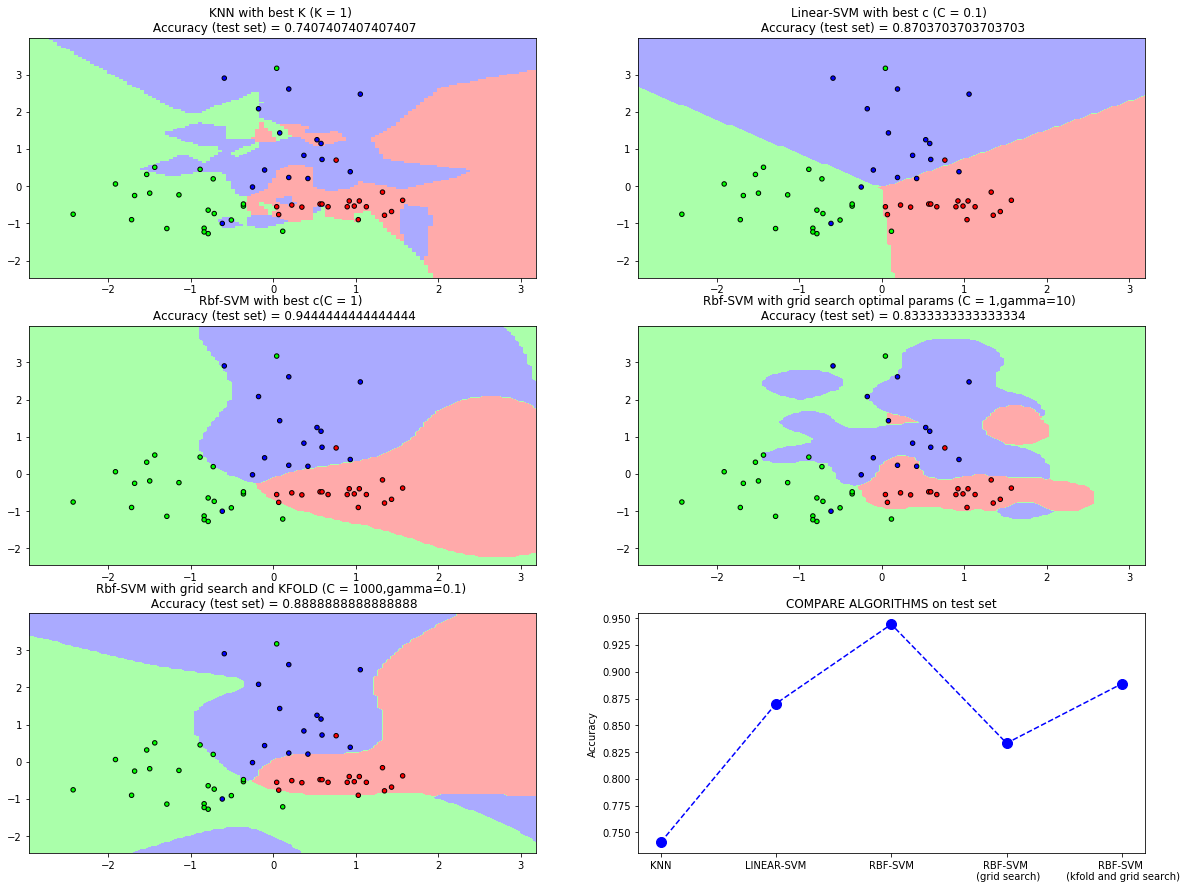

In [341]:
fig, sub = plt.subplots(3, 2,figsize=(20,15))
result={}
#KNN with best K
graph=sub.flatten()[0]
xx,yy = make_meshgrid(x_train_val[:, 0],x_train_val[:, 1],0.05)
plot_boundaries(graph,knn,xx,yy,'colormesh')    
#the test points
graph.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
graph.set_xlim(xx.min(), xx.max())
graph.set_ylim(yy.min(), yy.max())
#accuracy 
pred_i = knn.predict(x_test)
accuracy=metrics.accuracy_score(y_test, pred_i)
graph.set_title("KNN with best K (K = {k}) \n Accuracy (test set) = {acc}".format(k=best_k,acc=accuracy))
result['KNN']=accuracy
# SVM LINEAR
graph=sub.flatten()[1]
xx,yy = make_meshgrid(x_train_val[:, 0],x_train_val[:, 1],0.05)
plot_boundaries(graph,svm_linear,xx,yy,'contour')    
#the test points
graph.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
graph.set_xlim(xx.min(), xx.max())
graph.set_ylim(yy.min(), yy.max())
#accuracy 
pred_i = svm_linear.predict(x_test)
accuracy=metrics.accuracy_score(y_test, pred_i)
graph.set_title("Linear-SVM with best c (C = {c}) \n Accuracy (test set) = {acc}".format(c=best_c_linear,acc=accuracy))
result['LINEAR-SVM']=accuracy


#SVM RBF KERNEL
graph=sub.flatten()[2]
xx,yy = make_meshgrid(x_train_val[:, 0],x_train_val[:, 1],0.05)
plot_boundaries(graph,svm_rbf,xx,yy,'contour')    
#the test points
graph.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
graph.set_xlim(xx.min(), xx.max())
graph.set_ylim(yy.min(), yy.max())
#accuracy 
pred_i = svm_rbf.predict(x_test)
accuracy=metrics.accuracy_score(y_test, pred_i)
graph.set_title("Rbf-SVM with best c(C = {c}) \n Accuracy (test set) = {acc}".format(c=best_rbf_c,acc=accuracy))
result['RBF-SVM']=accuracy



#SVM RBF KERNEL WITH GRID SEARCH
graph=sub.flatten()[3]
xx,yy = make_meshgrid(x_train_val[:, 0],x_train_val[:, 1],0.05)
plot_boundaries(graph,svm_rbf_grid,xx,yy,'contour')    
#the test points
graph.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
graph.set_xlim(xx.min(), xx.max())
graph.set_ylim(yy.min(), yy.max())
#accuracy 
pred_i = svm_rbf_grid.predict(x_test)
accuracy=metrics.accuracy_score(y_test, pred_i)
graph.set_title("Rbf-SVM with grid search optimal params (C = {c},gamma={g}) \n Accuracy (test set) = {acc}".format(c=grid_result['c'],g=grid_result['gamma'],acc=accuracy))
result['RBF-SVM \n (grid search)']=accuracy


#SVM RBF WITH K-FOLD AND GRID SEARCH
graph=sub.flatten()[4]
xx,yy = make_meshgrid(x_train_val[:, 0],x_train_val[:, 1],0.05)
plot_boundaries(graph,svm_rbf_kfold,xx,yy,'contour')    
#the test points
graph.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
graph.set_xlim(xx.min(), xx.max())
graph.set_ylim(yy.min(), yy.max())
#accuracy 
pred_i = svm_rbf_kfold.predict(x_test)
accuracy=metrics.accuracy_score(y_test, pred_i)
graph.set_title("Rbf-SVM with grid search and KFOLD (C = {c},gamma={g}) \n Accuracy (test set) = {acc}".format(c=best_params['C'],g=best_params['gamma'],acc=accuracy))

result['RBF-SVM \n (kfold and grid search)']=accuracy


graph=sub.flatten()[-1]
graph.plot(list(result.keys()), list(result.values()), color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
graph.set_title('COMPARE ALGORITHMS on test set')
graph.set_ylabel('Accuracy')


plt.show()

## Extra: differences between knn and svm


in strictly visual terms, we can see more jagged and variable boundaries on the Knn, while in the SVM the boundaries seem more smooth and defined, in this case we found the rbf-svm with a best accuracy on test set, but this as i said early
is extremly dipendent on how and wich splits are generated, i make several running with different random_state seed and generally the pattern of the last graph is not respected, 
sometimes for example, the knn model returns better results than the SVM 


## Extra: choose different attributes 

i've also tryed with different attributes, 
model behavior, accuracy and boundaries changing accordingly.
(for trying this on code just uncomment the line on first page of code script)

Example with attributes #8 and #9 (instead #0 and #1)


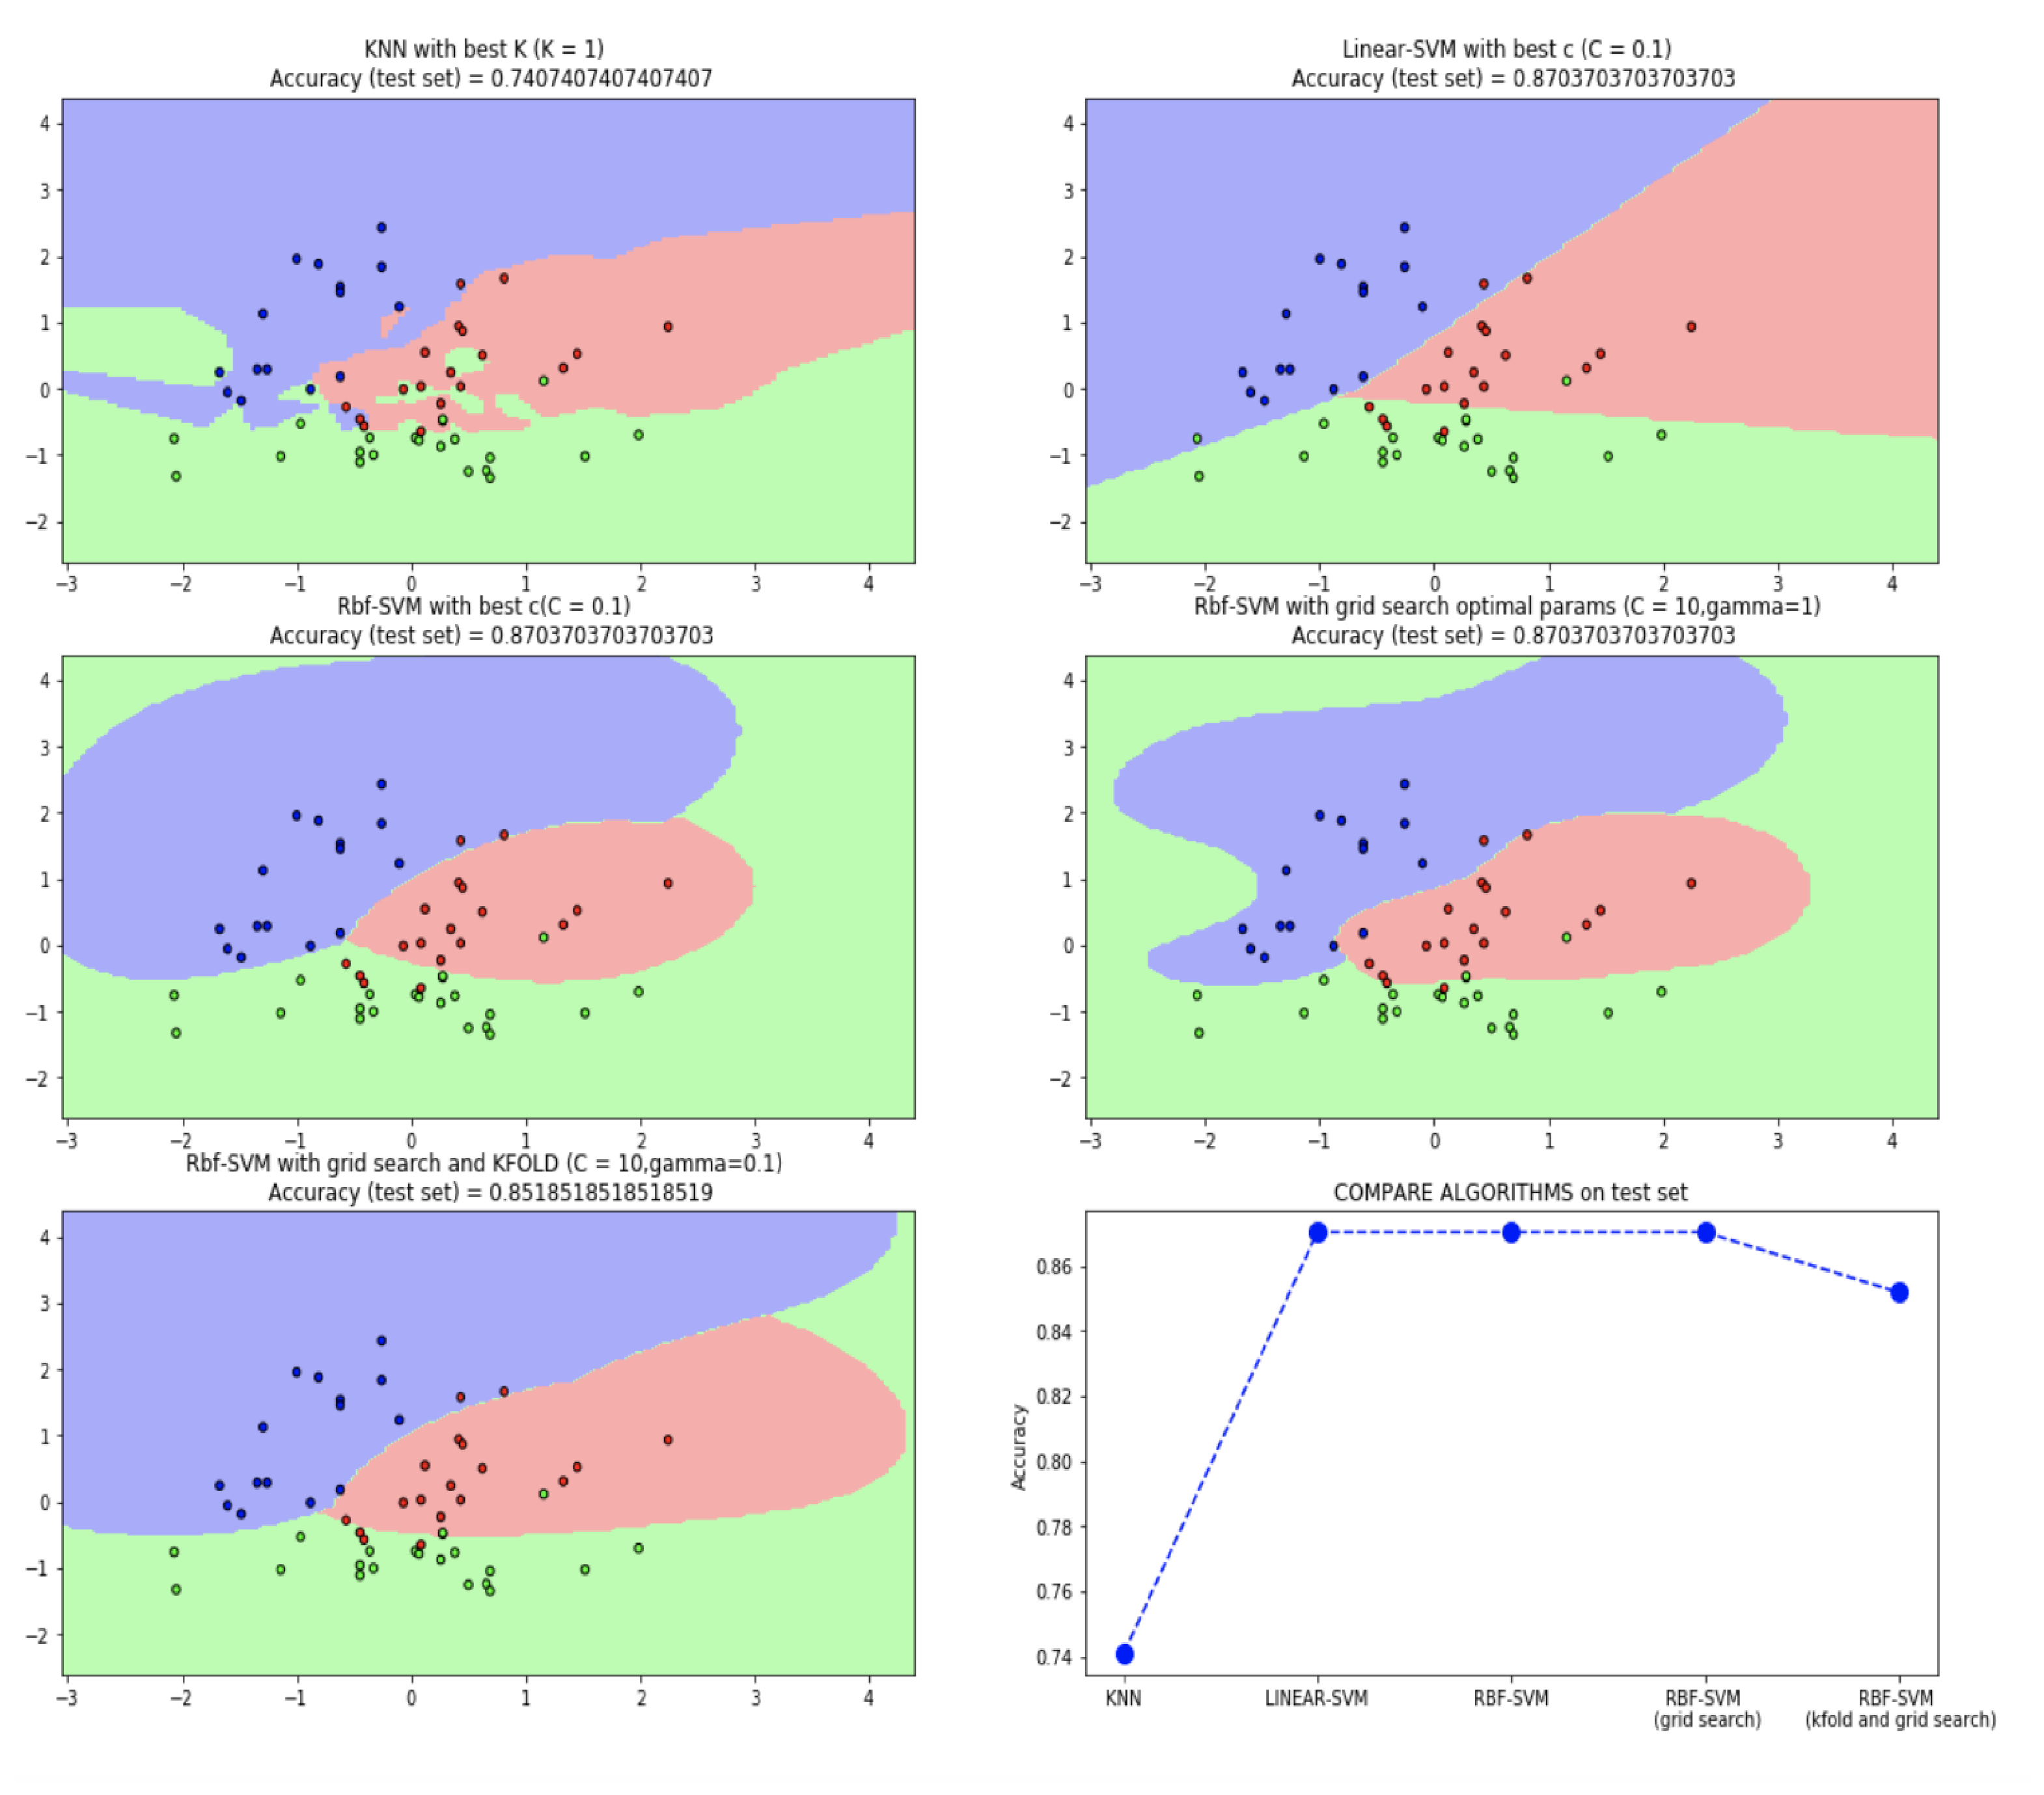

In [343]:
# plot the screenshot of the comparization of different model with a different pair of attributes

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('image.png')
plt.figure(figsize=(20,18),dpi=200)
imgplot = plt.imshow(img,aspect='auto')
plt.axis('off')
plt.show()



